# Neural Networks

In Layman's terms Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning. They are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.
Technically speaking Artificial neural networks (ANNs) (another name for Neural Networks) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.Neural networks rely on training data to learn and improve their accuracy over time.
After a neural network is fine tuned and successfully trained, it can then be used to solve real world problems like classification of images, prediction of different parameters be it weather forecast, market etc.

# How do Neural Networks work?

To understand how a neural network work we can think of each individual node (smallest unit of a neural network) as a complex model consisting of input data, weights, a bias (or threshold), and an output. The formula would look something like this:
              <blockquote>∑wixi + bias = w1x1 + w2x2 + w3x3 + bias </blockquote>
             <blockquote> output = f(x) = 1 if ∑w1x1 + b >= 0;
                                 0 if ∑w1x1 + b < 0 </blockquote>
Once an input layer is determined, weights are assigned at random at first, then as the model is trained these weights are also fine tuned to given the most preferable outcome. These weights help determine the importance of any given variable, with larger ones contributing more significantly to the output compared to other inputs. All inputs are then multiplied by their respective weights and then summed. Afterward, the output is passed through an activation function, which determines the output. If that output exceeds a given threshold, it “fires” (or activates) the node, passing data to the next layer in the network. This results in the output of one node becoming in the input of the next node. This process of passing data from one layer to the next layer defines this neural network as a feedforward network.

# Activation Function

Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.
A neural network without an activation function is essentially just a linear regression model. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

### Some Activation Functions are:

#### Sigmoid Function:

It is a function which is plotted as ‘S’ shaped graph.
Equation :
A = 1/(1 + e-x)

#### Tanh Function:

The activation that works almost always better than sigmoid function is Tanh function also knows as Tangent Hyperbolic function. It’s actually mathematically shifted version of the sigmoid function.
>f(x) = tanh(x) = 2/(1 + e^-2x) - 1 <br>
OR <br>
tanh(x) = 2 * sigmoid(2x) - 1 

#### RELU

Stands for Rectified linear unit. It is the most widely used activation function. Chiefly implemented in hidden layers of Neural network. <br>
A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise

The basic rule of thumb is if you really don’t know what activation function to use, then simply use RELU as it is a general activation function and is used in most cases these days.

## Cost Function

A Cost Function is used to measure just how wrong the model is in finding a relation between the input and output. It tells you how badly your model is behaving/predicting.Or how far is your predicted output is from ground truth. <br>
There are many different types of Cost function available like CrossEntropyLoss, NegativeLogLikelihood loss etc and choosing the correct function according to the problem requirement is also very important.

## Gradient Descent

Gradient Descent is an algorithm that is used to optimize the cost function or the error of the model. It is used to find the minimum value of error possible in your model.Gradient Descent can be thought of as the direction you have to take to reach the least possible error. The error in your model can be different at different points, and you have to find the quickest way to minimize it, to prevent resource wastage.<br>
In gradient descent, you find the error in your model for different values of input variables. This is repeated, and soon you see that the error values keep getting smaller and smaller. Soon you’ll arrive at the values for variables when the error is the least, and the cost function is optimized.

## Backpropagation

Backpropagation is the essence of neural network training. It is the method of fine-tuning the weights of a neural network based on the error rate obtained in the previous iteration. Proper tuning of the weights allows you to reduce error rates and make the model reliable by increasing its generalization. <br>
Backpropagation in neural network is a short form for “backward propagation of errors.” It is a standard method of training artificial neural networks. This method helps calculate the gradient of a loss function with respect to all the weights in the network.

#### How Backpropagation works?

At the heart of backpropagation is an expression for the partial derivative ∂C/∂w of the cost function C with respect to any weight w (or bias b) in the network. The expression tells us how quickly the cost changes when we change the weights and biases. <br>
So as to not make this very overwhelming to understand in simple terms we can understang the working of Backpropagation as follows: <br>
- We run the model with randomised weights that means data is passed through all the layers and an error is calculated using cost function. <br>
- We then take partial derivative of cost function wrt different weights, this quantity is used to change weights values <br>
- The model is again run with these modified weights and data is passed through all the layers and a cost is again calculated<br>
- This process is repeated until we get minimum loss.


# Below I have tried to build a CNN Model to classify MNIST Dataset using Pytorch

Importing the required libraries

In [87]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Checking to see if the GPU is available or not (if available use that).

In [88]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Downloading and loading the MNIST dataset in train and test loader with appropriate transforms and normalization

In [86]:
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1,), (0.5,))
                             ])),
  batch_size=1000, shuffle=True)

Retrieving some example images to check if the data is loaded correctly or not

In [89]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data, example_targets = example_data.to(device), example_targets.to(device)

In [90]:
example_data.shape

torch.Size([1000, 1, 28, 28])

Printing some images from the downloaded dataset.

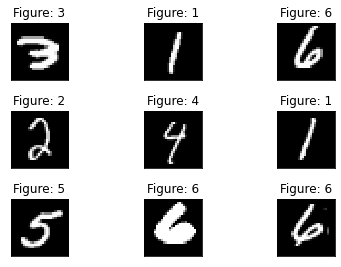

In [102]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Figure: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

Writing the Network/model which we will use

In [119]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.convolutaional_neural_network_layers = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2), 

                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2) 
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(in_features=64, out_features=10)
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return F.log_softmax(x,dim = 1)

Below we can see the number and types of different layers in the Network as well as the activation function used

In [120]:
network = NN()
network.to(device)
print(network)

NN(
  (convolutaional_neural_network_layers): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


Defining learning rate, optimizer and cost function used

In [121]:
learning_rate = 0.001
optimizer = optim.Adam(network.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()

Some other hyperparameters for keeping track of loss and training

In [122]:
epochs = 5
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

Defining training function, the general flow goes as follows:<br>
- We start the trainig mode
- We load the images and labels from train_loader
- We set gradient to zero (so as to prevent gradient overlapping)
- We run the data through each layer and calculate loss using cost function
- This loss is then backpropagated to modify weight
- Then optimizer is used to optimise the weights and run the model again
- In between training we print the status of model in the form of loss at the end of each iteration


In [123]:
log_interval = 10
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data,target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

After training our model for some time we test it using eval mode and simply running data through each layer.

In [124]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data,target = data.to(device), target.to(device)
      output = network(data)
      test_loss += criterion(output, target).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  #test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

Actual calling of test and train function. We check how model behaves without any training then see the improvement

In [125]:
test()
for epoch in range(1, epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 23.1755, Accuracy: 1273/10000 (13%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316149
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.918007
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.283488
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.759766
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.553724
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.593842
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.516215
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.554239
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.684718
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.374137
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.373627
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.400426
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.476154
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.414827
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.435834
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.360325
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.231278
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.145352
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.182283
Train Epoch: 1 [1216

After the training is complete we check if the model is predicting correctly or not using visual representation.

In [126]:
with torch.no_grad():
  output = network(example_data)

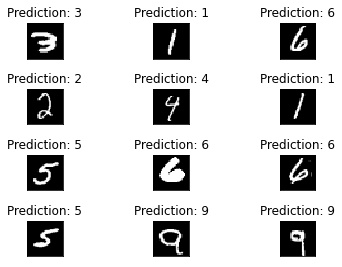

In [127]:
fig = plt.figure()
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])